<a href="https://colab.research.google.com/github/Crisosth/IA/blob/main/SistemaFuzzy_CalculoGorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalaçao do pacote fuzzy
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=93a1756f27811c2f70d8fafce7c5cbdffcf454fe7f9ee58f0dcd167254b0d7c4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy



Classifique a qualidade da comida [0-10]: 10

Classifique a qualidade do serviço [0-10]: 10

Porcentagem da Gorjeta:  20.04 %




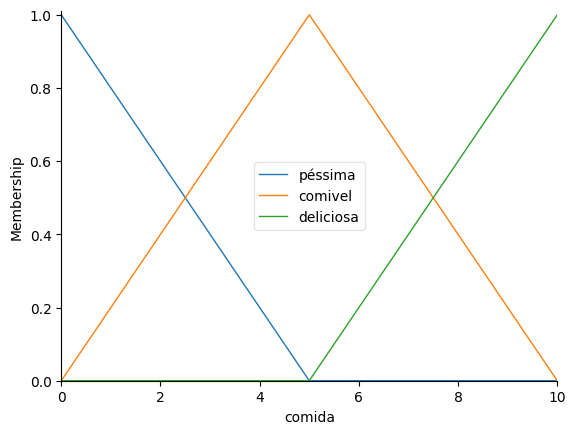

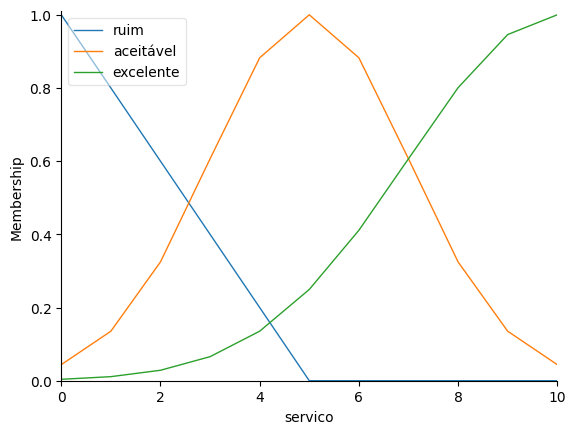

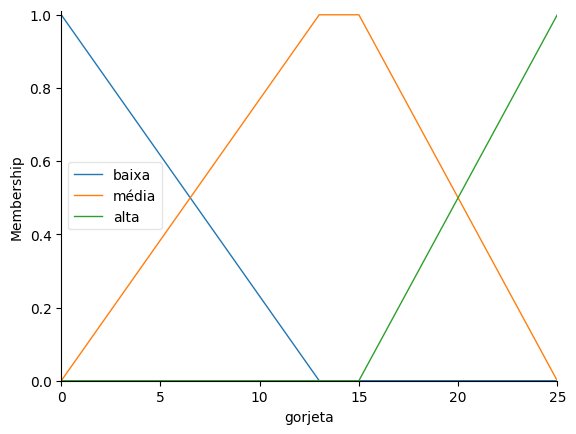

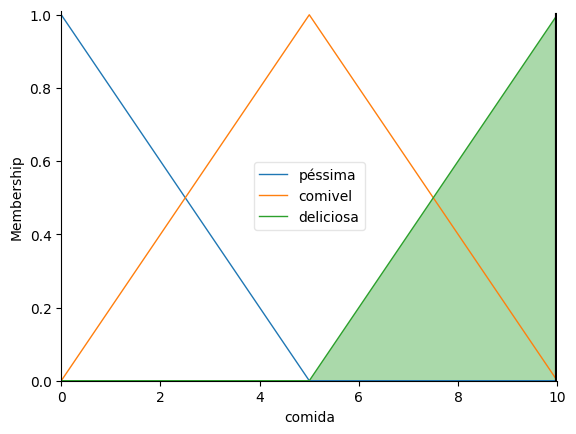

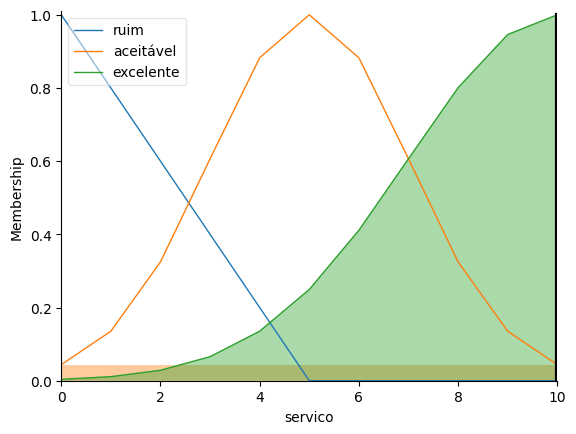

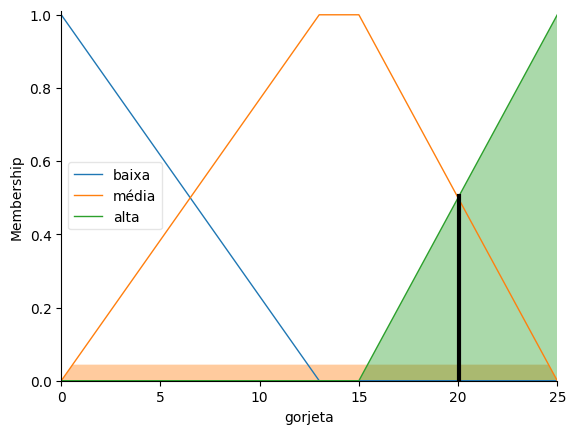

In [ ]:
#instalaçao das bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#cria antecedentes -  variaveis de entrada
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida') #valores de 0 a 10
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico') #valores de 0 a 10

#cria consequente - variavel de saída
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta') #valores de 0 a 25

#Cria as funções de pertinencia:
#1) cria função de pertinencia automatica padrão triangular para comida
# faz o mapeamento automatico entre os valores numéricos e os difusos
comida.automf(number = 3, names=['péssima','comivel','deliciosa']) #função triangular padrão

#2) Cria funções de pertinencia personalizadas usando tipos variados
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5]) #função triangular
servico['aceitável'] = fuzz.gaussmf(servico.universe, 5, 2) #função gaussiana
servico['excelente'] = fuzz.gaussmf(servico.universe, 10, 3) #função gaussiana

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13]) #função triangular
gorjeta['média'] = fuzz.trapmf(gorjeta.universe, [0, 13, 15, 25]) #função trapezoidal
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25]) #função triangular

#mostra graficamente as funções de pertinencia criadas
comida.view()
servico.view()
gorjeta.view()

#cria as regras de decisão difusas
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

#cria sistema fuzzy:

#1)cria a classe de controle do sistema fuzzy, usando as regras definidas
ControladorGorjeta = ctrl.ControlSystem([rule1, rule2, rule3])

#2)cria o objeto da classe Sistema fuzzy
SistemaGorjeta = ctrl.ControlSystemSimulation(ControladorGorjeta)

#entrada de dados no sistema fuzzy - Nota de qualidade da comida - fuzzificação
comidaNota = input("\nClassifique a qualidade da comida [0-10]: ")
SistemaGorjeta.input['comida'] = float(comidaNota)

#entrada de dados no sistema fuzzy - Nota de qualidade do serviço - fuzzificação
servicoNota = input("\nClassifique a qualidade do serviço [0-10]: ")
SistemaGorjeta.input['servico'] = float(servicoNota)

#Sistema fuzzy processa e defuzzifica o resultado da gorjeta
SistemaGorjeta.compute()

#Saida de dados do sistema fuzzy - defuzzificação
print("\nPorcentagem da Gorjeta: ", round(SistemaGorjeta.output['gorjeta'], 2), "%\n\n")

#Mostra graficamente o resultado da simulação (Fuzzificação e Defuzzificação)
comida.view(sim=SistemaGorjeta)
servico.view(sim=SistemaGorjeta)
gorjeta.view(sim=SistemaGorjeta)



#Sistema Fuzzy- Calculo de Gorjetas
* Sistema de controle difuso que modela ocálculo percentual da gorjeta em um restaurante
-O cálculo leva em consideração o serviço e a qualidade da comida avaliados entre 0 e 10.

**1-Antecedentes(Entradas)**

1a-Qualidade da comida
* Universo(faixa de valores reais):Quão saborosa é a comida numa escala de 0 a 10?
*Conjunto difuso(faixa de valores difusos): péssima, comível, deliciosa

1b-Serviço

* Universo:quão bom é o atendimento dos garçons, em uma escala de 0 a 10?
*Conjunto difuso: ruim, aceitável, excelente

**2-Consequente(Saída)**

2a-Gorjeta
* Universo: Quanto se deve dar de gorjeta numa escala de 0% a 25%?
*Conjunto difuso: baixa, média, alta

**3-Regras**

* SE o serviço foi bom ou a qualidade da comida foi boa,**ENTÃO** a gorjeta será alta
*SE o serviço foi mediano, **ENTÃO** a gorjeta será média
*SE o serviço for ruim e a qualidade da comida for ruim, **ENTÃO** a gorjeta será baixa